## Observations and Insights

1. The line plot of time point versus tumor volume for a mouse treated with Capomulin shows that that mouse's tumor steadily reduced in size, which is promising because this was the regimen of interest. In order to understand the drug's efficacy, we should next look at the tumor size progression of the entire sample treated with Capomulin.
2. The regression model for mouse weight versus average tumor volume shows a linear association between weight and tumor volume. Further, there is a strong positive correltion between mouse weight an tumor volume. As a mouse's weight increases, tumor size also tends to increase.
3. According to the IQR calculations and box-and-whisker plots, the Capomulin and Ramican regimens showed lower final tumor volume, so these treatments were more effective than Infubinol and Ceftamin. The inital tumor volumes were 45 mm3 for every mouse so many of the mice who received Infubinol and Ceftamin had their tumors grow larger and did not show much better results than the placebo condition.

## Dependencies and starter code

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
pharma_df = pd.merge(mouse_metadata, study_results, how='outer')

## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# list of regimens
regimens = pharma_df['Drug Regimen'].unique()

# initialize a list for dfs, one for each regimen
d = []

# grab the columns we need 
pharma_df_tumor_volume = pharma_df[['Drug Regimen', 'Tumor Volume (mm3)']]

# iterate through the dataset to create a df for each regimen
for regimen in range(len(regimens)):
     d.append(pharma_df_tumor_volume[pharma_df_tumor_volume['Drug Regimen'] == regimens[regimen]])

# initialize a list for each statistic
r_means = []
r_medians = []
r_vars = [] 
r_sds = [] 
r_sems = []  # standard deviation divided by square root of sample size

# compute the statistics for each regimen, using the corresponding df
for regimen_df in range(len(d)): 
    r_means.append(np.mean(d[regimen_df]["Tumor Volume (mm3)"]))
    r_medians.append(np.median(d[regimen_df]["Tumor Volume (mm3)"]))
    r_vars.append(np.var(d[regimen_df]["Tumor Volume (mm3)"], ddof = 1))   # ddof = 1 for a sample
    r_sds.append(np.std(d[regimen_df]["Tumor Volume (mm3)"], ddof = 1))    # ddof = 1 for a sample
    r_sems.append(sts.sem(d[regimen_df]["Tumor Volume (mm3)"], ddof = 1))  # ddof = 1 for a sample
    

# create summary df
summary_df = pd.DataFrame({"Drug Regimens": regimens,
                          'Mean': r_means,
                          'Median': r_medians,
                          'Variance': r_vars,
                          'SD':r_sds,
                          'SEM': r_sems})
summary_df

,Drug Regimens,Mean,Median,Variance,SD,SEM
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

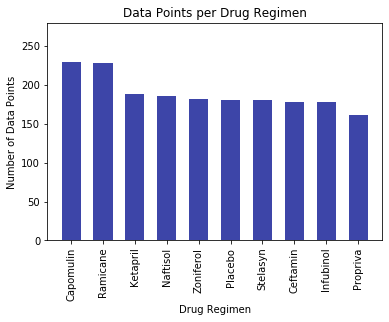

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# create a df to plot that includes drug regimens and number of data points
regimen_counts_df = pharma_df.groupby(['Drug Regimen']).count().reset_index()

# include only columns of interest
regimen_counts_df = regimen_counts_df[['Drug Regimen', 'Mouse ID']]

# rename columns more intuitively
regimen_counts_df = regimen_counts_df.rename(columns = {'Mouse ID': 'Mouse ID Count'})

# sort the y-axis values
regimen_counts_df.sort_values('Mouse ID Count', ascending = False, inplace = True)

# plot drug regimen vs. count of data points
regimen_counts_df.plot(kind = 'bar', x = 'Drug Regimen', y = 'Mouse ID Count', 
                       legend = None, color='#0c1793', alpha = .8, width = 0.6)
plt.xlim(-0.75, len(regimens)-0.25)
plt.ylim(0, max(regimen_counts_df['Mouse ID Count']) + 50)
plt.xticks(rotation = 90)
plt.title("Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

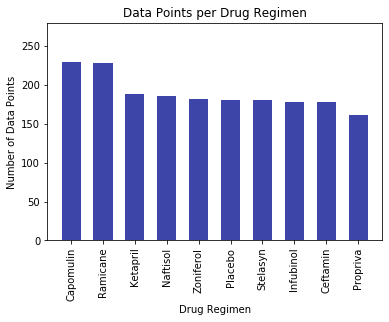

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# initalize a list to store the number of data points for each regimen
regimen_data_points = []

# store the number of data points for each regimen (can use # of rows as a proxy for # of data points)
for regimen in range(len(d)):
    regimen_data_points.append(len(d[regimen]["Tumor Volume (mm3)"]))
    
# create a df so I can sort the values and make this plot identical to the one above
data_df = pd.DataFrame({'regimens': regimens, 
                        'regimen_data_points': regimen_data_points})
data_df.sort_values(by='regimen_data_points', ascending = False, inplace = True)

# plot drug regimen vs. count of data points
plt.bar(data_df.regimens, data_df.regimen_data_points, color='#0c1793', 
        alpha = .8, align = "center", width = 0.6)
plt.xlim(-0.75, len(regimens) - 0.25)
plt.ylim(0, max(regimen_data_points) + 50)
plt.xticks(rotation = 90)
plt.title("Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")


plt.show()

## Pie plots

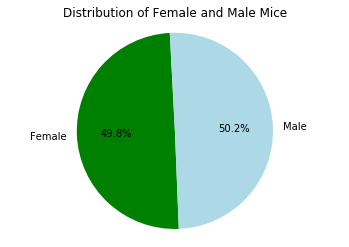

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# group metadata df to get counts of male and female mice
sex_counts = mouse_metadata.groupby('Sex').count().reset_index()

# store the 'Male' and 'Female' labels
sex = sex_counts['Sex']
sex_counts = sex_counts.rename(columns = {'Sex': 'Male or Female',
                                          'Mouse ID': 'Sex'})
sex_counts = sex_counts['Sex']

colors = ['green', 'lightblue']
sex_counts.plot(kind= 'pie', labels = sex, colors = colors,
        autopct="%1.1f%%", shadow = False, startangle = 93)
plt.axis('equal')
plt.ylabel('') # remove this to make identical to plot below
plt.title('Distribution of Female and Male Mice')
plt.show()

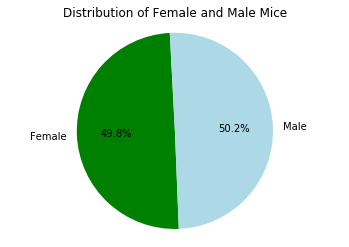

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# sex_counts = mouse_metadata.groupby('Sex').count().reset_index()
# sex = sex_counts['Sex']
# sex_counts = sex_counts['Mouse ID']

# colors = ['green', 'lightblue']

# we use the same counts as the cell above
plt.pie(sex_counts, labels = sex, colors = colors,
        autopct="%1.1f%%", shadow = False, startangle = 93)
plt.axis('equal')
plt.title('Distribution of Female and Male Mice')
plt.show()

## Quartiles, outliers and boxplots

In [11]:
# Method 1: Final timepoint of each mouse (regardless of whether they made it to timepoint 45)
max_timepoint = pharma_df[['Mouse ID', 'Timepoint']].groupby(['Mouse ID']).max().reset_index()
max_timepoint_df = pd.merge(max_timepoint, pharma_df, how = 'left')

# most promising treatment regimens are: Capomulin, Ramicane, Infubinol, and Ceftamin
best_regimens_cond = (max_timepoint_df['Drug Regimen'] == 'Capomulin') | (max_timepoint_df['Drug Regimen'] == 'Ramicane') | (max_timepoint_df['Drug Regimen'] == 'Infubinol') | (max_timepoint_df['Drug Regimen'] == 'Ceftamin')
pharma_max_timepoint = max_timepoint_df[best_regimens_cond]  # some timepoints will be before time 45, but i've kept  this df name for convenience

# # # Method 2: final tumor volume occurs at timepoint 45, so use these mice
# pharma_max_timepoint = pharma_df[pharma_df['Timepoint'] == pharma_df['Timepoint'].max()]

# # most promising treatment regimens are: Capomulin, Ramicane, Infubinol, and Ceftamin
# best_regimens_cond = (pharma_max_timepoint['Drug Regimen'] == 'Capomulin') | (pharma_max_timepoint['Drug Regimen'] == 'Ramicane') | (pharma_max_timepoint['Drug Regimen'] == 'Infubinol') | (ppharma_max_timepoint['Drug Regimen'] == 'Ceftamin')
# pharma_max_timepoint = pharma_max_timepoint[best_regimens_cond]

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# IQR
final_tumor_vols = pharma_max_timepoint['Tumor Volume (mm3)']
quartiles = final_tumor_vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
medq = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq

# potential outliers are below the lower bound and above the upper bound
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

# find Mouse IDs of outliers
outliers_cond = (pharma_max_timepoint['Tumor Volume (mm3)'] < lower_bound) | (pharma_max_timepoint['Tumor Volume (mm3)'] > upper_bound)
outlier_ids = pharma_max_timepoint[outliers_cond]['Mouse ID']

outlier_ids # there are no outliers according to the IQR calculation

Series([], Name: Mouse ID, dtype: object)

In [13]:
# Capomulin
capomulin_cond = (pharma_max_timepoint['Drug Regimen'] == 'Capomulin')
capomulin_final_vol = pharma_max_timepoint[capomulin_cond]
capomulin_final_vol

# IQR
capomulin_tumor_vols = capomulin_final_vol['Tumor Volume (mm3)']
quartiles_capomulin = capomulin_tumor_vols.quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
medq_capomulin = quartiles_capomulin[0.5]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin - lowerq_capomulin

# potential outliers are below the lower bound and above the upper bound
lower_bound_capomulin = lowerq_capomulin - (1.5 * iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5 * iqr_capomulin)

# find Mouse IDs of outliers
outliers_cond_capomulin = (capomulin_final_vol['Tumor Volume (mm3)'] < lower_bound_capomulin) | (capomulin_final_vol['Tumor Volume (mm3)'] > upper_bound_capomulin)
outlier_ids_capomulin = capomulin_final_vol[outliers_cond_capomulin]['Mouse ID']

In [14]:
# Ramicane
ramicane_cond = (pharma_max_timepoint['Drug Regimen'] == 'Ramicane')
ramicane_final_vol = pharma_max_timepoint[ramicane_cond]

# IQR
ramicane_tumor_vols = ramicane_final_vol['Tumor Volume (mm3)']
quartiles_ramicane = ramicane_tumor_vols.quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
medq_ramicane = quartiles_ramicane[0.5]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane - lowerq_ramicane

# potential outliers are below the lower bound and above the upper bound
lower_bound_ramicane = lowerq_ramicane - (1.5 * iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5 * iqr_ramicane)

# find Mouse IDs of outliers
outliers_cond_ramicane = (ramicane_final_vol['Tumor Volume (mm3)'] < lower_bound_ramicane) | (ramicane_final_vol['Tumor Volume (mm3)'] > upper_bound_ramicane)
outlier_ids_ramicane = ramicane_final_vol[outliers_cond_ramicane]['Mouse ID']

In [15]:
# Infubinol
infubinol_cond = (pharma_max_timepoint['Drug Regimen'] == 'Infubinol')
infubinol_final_vol = pharma_max_timepoint[infubinol_cond]

# IQR
infubinol_tumor_vols = infubinol_final_vol['Tumor Volume (mm3)']
quartiles_infubinol = infubinol_tumor_vols.quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
medq_infubinol = quartiles_infubinol[0.5]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol - lowerq_infubinol

# potential outliers are below the lower bound and above the upper bound
lower_bound_infubinol = lowerq_infubinol - (1.5 * iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5 * iqr_infubinol)

# find Mouse IDs of outliers
outliers_cond_infubinol = (infubinol_final_vol['Tumor Volume (mm3)'] < lower_bound_infubinol) | (infubinol_final_vol['Tumor Volume (mm3)'] > upper_bound_infubinol)
outlier_ids_infubinol = infubinol_final_vol[outliers_cond_infubinol]['Mouse ID']

In [16]:
# Ceftamin
ceftamin_cond = (pharma_max_timepoint['Drug Regimen'] == 'Ceftamin')
ceftamin_final_vol = pharma_max_timepoint[ceftamin_cond]

ceftamin_final_vol

# IQR
ceftamin_tumor_vols = ceftamin_final_vol['Tumor Volume (mm3)']
quartiles_ceftamin = ceftamin_tumor_vols.quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
medq_ceftamin = quartiles_ceftamin[0.5]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin - lowerq_ceftamin

# potential outliers are below the lower bound and above the upper bound
lower_bound_ceftamin = lowerq_ceftamin - (1.5 * iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5 * iqr_ceftamin)

# find Mouse IDs of outliers
outliers_cond_ceftamin = (ceftamin_final_vol['Tumor Volume (mm3)'] < lower_bound_ceftamin) | (ceftamin_final_vol['Tumor Volume (mm3)'] > upper_bound_ceftamin)
outlier_ids_ceftamin = ceftamin_final_vol[outliers_cond_ceftamin]['Mouse ID']

In [17]:
# make a summary table to look at the values we calculated
iqr_summary = pd.DataFrame({'Drug Regimen': ['All Data', 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],
                            'Lower Quartile': [lowerq, lowerq_capomulin, lowerq_ramicane, lowerq_infubinol, lowerq_ceftamin],
                            'Median': [medq, medq_capomulin, medq_ramicane, medq_infubinol, medq_ceftamin],
                            'Upper Quartile': [upperq, upperq_capomulin, upperq_ramicane, upperq_infubinol, upperq_ceftamin],
                            'IQR': [iqr, iqr_capomulin, iqr_ramicane, iqr_infubinol, iqr_ceftamin],
                            'Lower Bound': [lower_bound, lower_bound_capomulin, lower_bound_ramicane, lower_bound_infubinol, lower_bound_ceftamin],
                            'Upper Bound': [upper_bound, upper_bound_capomulin, upper_bound_ramicane, upper_bound_infubinol, upper_bound_ceftamin],
                            'Outlier IDs': [outlier_ids.unique(), outlier_ids_capomulin.unique(), outlier_ids_ramicane.unique(), outlier_ids_infubinol.unique(), outlier_ids_ceftamin.unique()]})

iqr_summary

,Drug Regimen,Lower Quartile,Median,Upper Quartile,IQR,Lower Bound,Upper Bound,Outlier IDs
0,All Data,37.187744,45.000000,59.930262,22.742518,3.073967,94.044039,[]
1,Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015,[]
2,Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811,[]
3,Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446,[c326]
4,Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458,[]


In [18]:
# Quantitatively determine outliers

print('Infubinol has an outlier: The lower bound is 36.83 and mouse c326 is below that value with a tumor volume of 36.32 mm3 at timepoint 5.')

Infubinol has an outlier: The lower bound is 36.83 and mouse c326 is below that value with a tumor volume of 36.32 mm3 at timepoint 5.


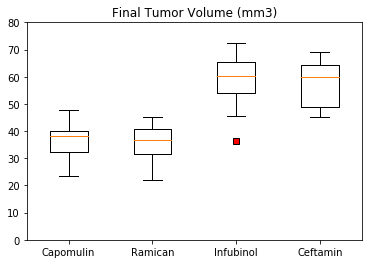

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# change the style of outliers 
outlier_symbols = dict(markerfacecolor='r', marker='s')

# create a list of the data
tumor_vol_data = [capomulin_final_vol['Tumor Volume (mm3)'], 
        ramicane_final_vol['Tumor Volume (mm3)'], 
        infubinol_final_vol['Tumor Volume (mm3)'], 
        ceftamin_final_vol['Tumor Volume (mm3)']]

# box plot for four most promosing treatments
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, flierprops = outlier_symbols)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramican', 'Infubinol', 'Ceftamin'])
plt.ylim(0, 80)

plt.show()

## Line and scatter plots

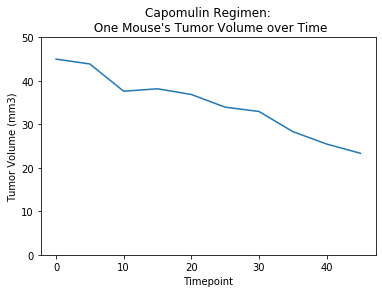

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# df for the Capomulin regimen
capo_cond = pharma_df['Drug Regimen'] == 'Capomulin'
capomulin_df = pharma_df.loc[capo_cond]

# pick a mouse
mouse_cond = capomulin_df['Mouse ID'] == 's185'
capomulin_mouse = capomulin_df.loc[mouse_cond]

# plot timepoint versus tumor volume
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.title('Capomulin Regimen:\n One Mouse\'s Tumor Volume over Time')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0, 50)  # x limits were okay, but y limits looked deceptive because y did not start at the origin
plt.show()

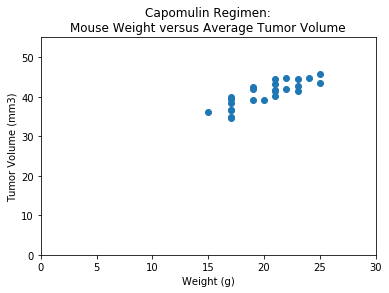

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# mean weight and tumor volumne for Capomulin
capomulin_mean = capomulin_df.groupby(['Mouse ID']).mean()

# plot weight versus average tumor volume
plt.scatter(capomulin_mean['Weight (g)'], capomulin_mean['Tumor Volume (mm3)'])
plt.title('Capomulin Regimen:\nMouse Weight versus Average Tumor Volume')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, 30) # start at the origin
plt.ylim(0, 55)
plt.show()

In [22]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# correlation coefficient
correlation_calc = sts.pearsonr(capomulin_mean['Weight (g)'], capomulin_mean['Tumor Volume (mm3)'])
correlation = correlation_calc[0].round(2)
corr_p_val = correlation_calc[1].round(7)

print(f'The correlation between mouse weight and average tumor volume is {correlation} with a p-value of {corr_p_val}, which is statisically significant at the .001 level.')

The correlation between mouse weight and average tumor volume is 0.84 with a p-value of 1e-07, which is statisically significant at the .001 level.


The r-squared value is: 0.71


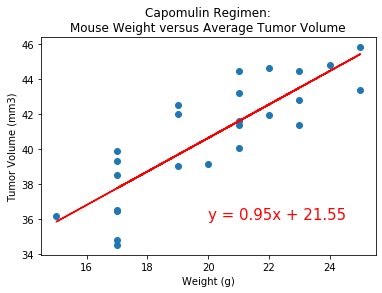

In [23]:
# regression model
regression = sts.linregress(capomulin_mean['Weight (g)'], capomulin_mean['Tumor Volume (mm3)'])

# regression equation to create line (y = mx + b)
slope = regression[0]
intercept = regression[1]
x = capomulin_mean['Weight (g)']
y = slope * x + intercept
rsq_value = round(regression[2]**2,2)

# plot weight versus average tumor volume
plt.scatter(capomulin_mean['Weight (g)'], capomulin_mean['Tumor Volume (mm3)'])
# plot regression line
plt.plot(x, y, color = 'r')
plt.title('Capomulin Regimen:\nMouse Weight versus Average Tumor Volume')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (20,36), fontsize = 15, color = "r")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared value is: {rsq_value}")

# I chose to use the default x and y limits for this plot
plt.show()